<a href="https://colab.research.google.com/github/Lucas-Buk/Machine-Learning-Metodos-Prob/blob/main/Aula_4_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# **Funções proprietárias**

In [2]:
from pylab import rcParams
from scipy import stats


def plot_densities(data):

    rcParams['figure.figsize'] = 12, 20

    # Filtra os dados de acordo com as sáidas possíveis

    outcome_0 = data[data['Diag'] == 0]
    outcome_1 = data[data['Diag'] == 1]

    # Cria a figura 
    fig, axs = plt.subplots(8, 1)
    fig.suptitle('Features densities for different outcomes 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # mostra as densidades de acordo com as variáveis de entrada
    
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="blue", legend=True,
                                    label=column_name + ' Diagnóstico = 0')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="black", legend=True,
                                     label=column_name + ' Diagnóstico = 1')
        
        KStest = stats.ks_2samp(outcome_0[column_name], outcome_1[column_name])

        ax.set_xlabel(column_name + ' valores')
        ax.set_title(column_name + ' Densidade')
        ax.grid('on')

    plt.show()
    fig.savefig('densities.png')

# **Base de dados**

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/ML MP/Datasets/diabetes.csv')
df.head(5)

,NG,Glicose,PD,Triceps,Insulina,IMC,DP,Idade,Diag
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NG        768 non-null    int64  
 1   Glicose   768 non-null    int64  
 2   PD        768 non-null    int64  
 3   Triceps   768 non-null    int64  
 4   Insulina  768 non-null    int64  
 5   IMC       768 non-null    float64
 6   DP        768 non-null    float64
 7   Idade     768 non-null    int64  
 8   Diag      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.agg(['nunique','count','size'])

,NG,Glicose,PD,Triceps,Insulina,IMC,DP,Idade,Diag
nunique,17,136,47,51,186,248,517,52,2
count,768,768,768,768,768,768,768,768,768
size,768,768,768,768,768,768,768,768,768


In [7]:
df.columns

Index(['NG', 'Glicose', 'PD', 'Triceps', 'Insulina', 'IMC', 'DP', 'Idade',
       'Diag'],
      dtype='object')

In [8]:
df.describe()

,NG,Glicose,PD,Triceps,Insulina,IMC,DP,Idade,Diag
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Exploração**

**Conteúdo sugerido**

1.   Matriz de correlação ordenada por significância
2.   Matriz de histogramas
3.   Matriz de densidade de probabildiade. Indentifique as principais prováveis distribuições de probabilidade "por inspeção".
4.   Mapa de calor indicando as principais correlações. O que você conclui?
5.   Matriz de espalhamento com a diagonal principal indicando as respectivas densidades. Explore um solormap que possibilite uma boa qualidade de visualização.
6.   Compare as densidades de probabildide para cada variável $X$ diferenciando se o diagnóstico é positivo ou negativo. Plote ambos em cores diferentes e sobrepostos visando estimar a grau de separabilidade.



In [9]:
#1
corr_matrix = df.corr()
corr_matrix["Diag"].sort_values(ascending=False)

Diag        1.000000
Glicose     0.466581
IMC         0.292695
Idade       0.238356
NG          0.221898
DP          0.173844
Insulina    0.130548
Triceps     0.074752
PD          0.065068
Name: Diag, dtype: float64

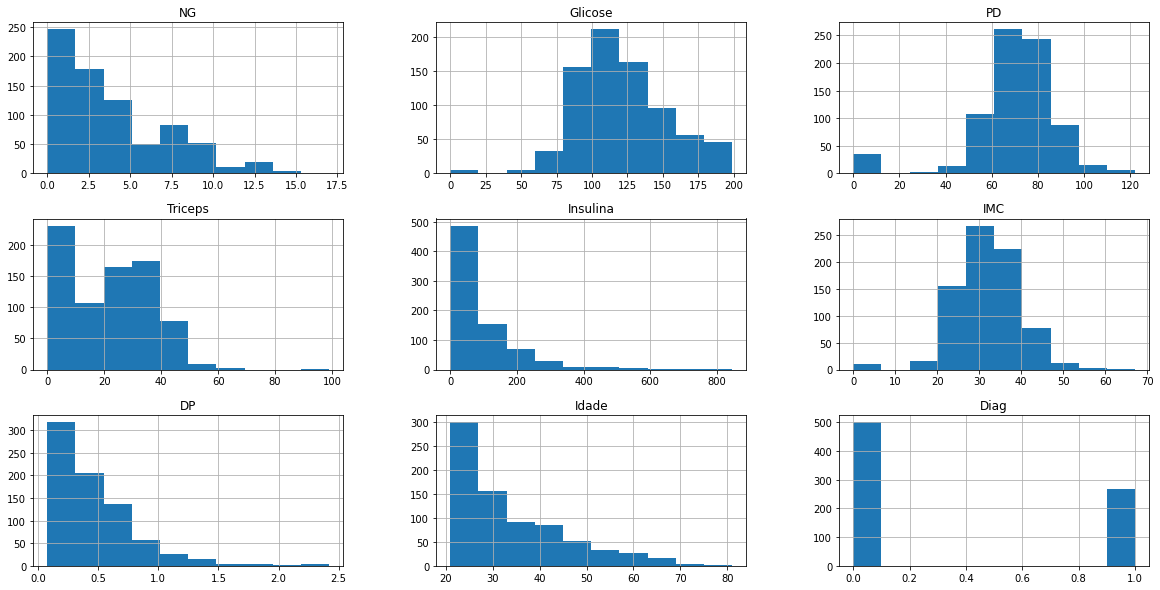

In [10]:
#2
df.hist(bins=10, figsize=(20,10))
plt.show()

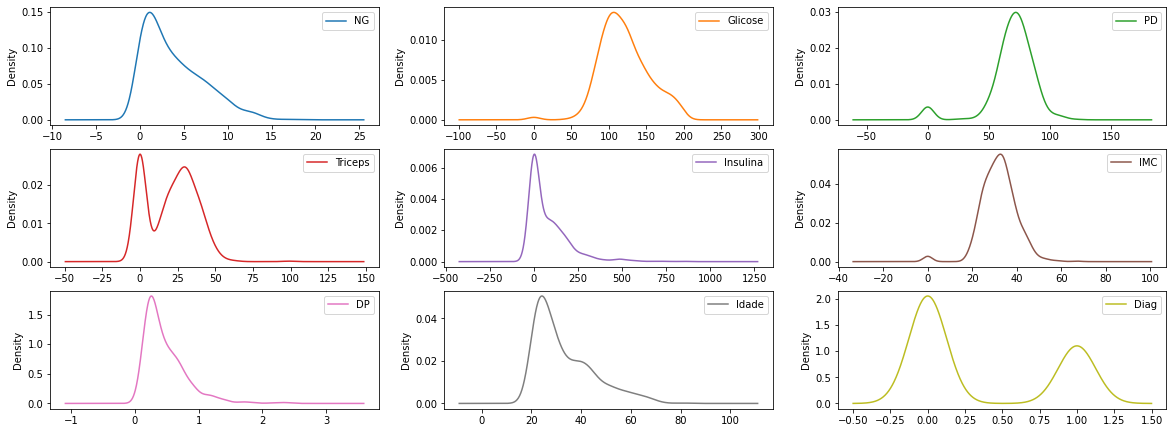

In [11]:
#3
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False, figsize=(20, 10))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


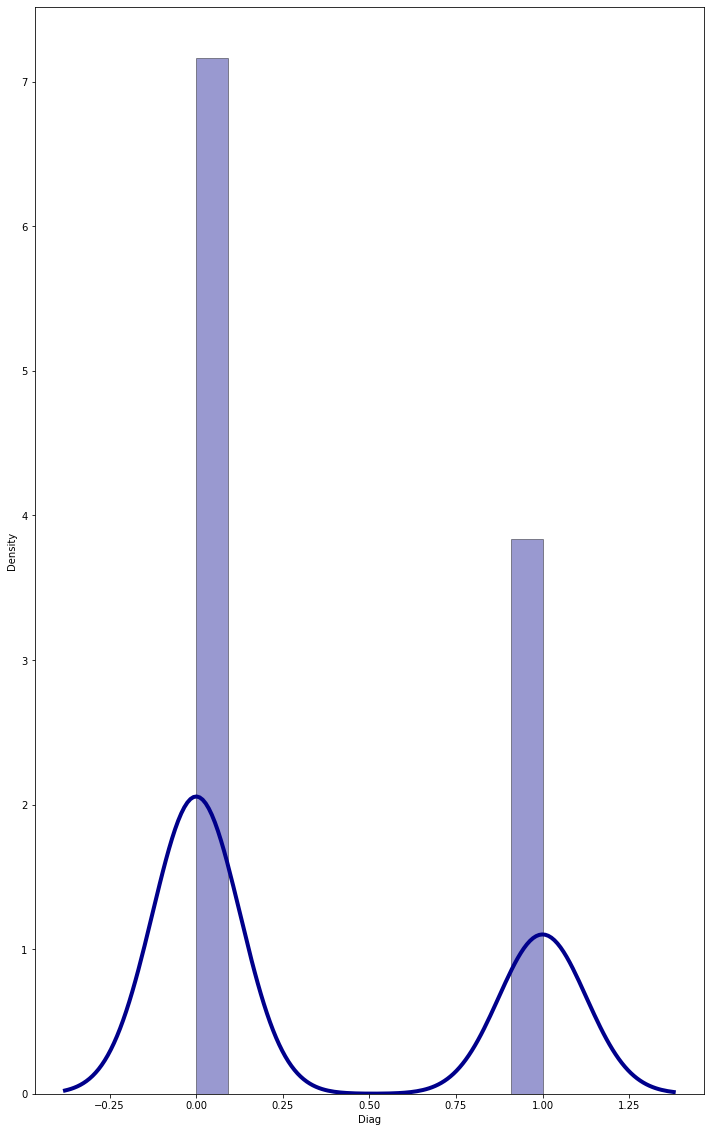

In [ ]:
sns.distplot(df['Diag'], hist=True, kde=True,
             bins='auto', color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

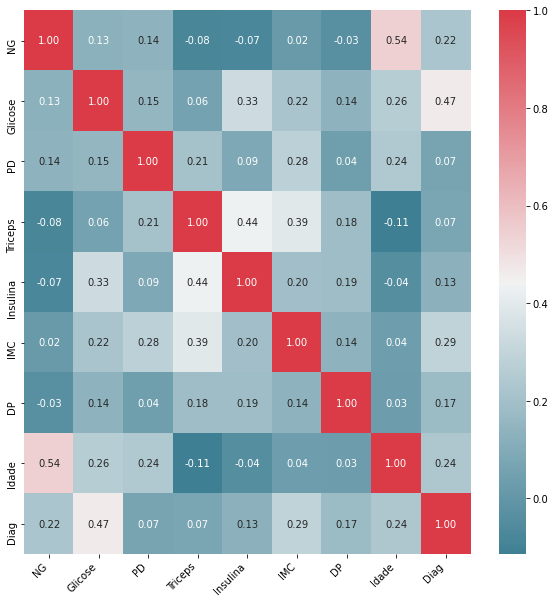

In [ ]:
#4
# Plot figsize
fig, ax = plt.subplots(figsize = (10, 10))

# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap = colormap, annot = True, fmt = ".2f")
ax.set_xticklabels(df.columns, rotation = 45, horizontalalignment = 'right');
ax.set_yticklabels(df.columns);

plt.show()

Não há correlações muito elevadas entre as variáveis, somente entre idade e número de gravidez

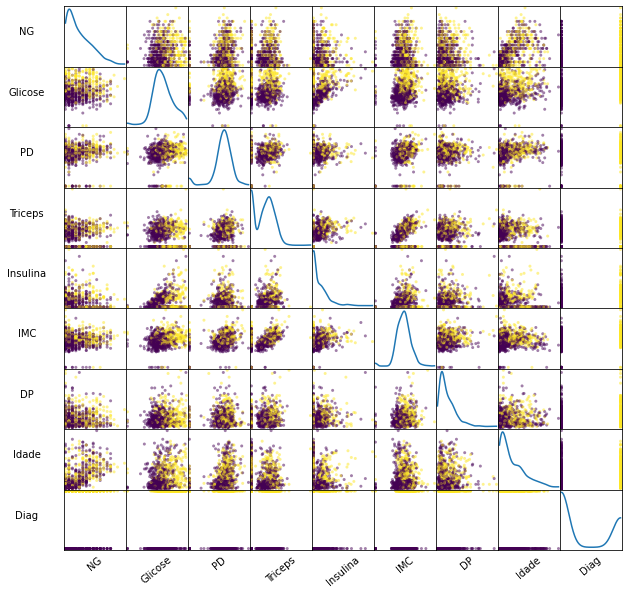

In [12]:
#5
from pandas.plotting import scatter_matrix
from matplotlib import cm

y = df['Diag']

cmap = cm.get_cmap('viridis')

sm = scatter_matrix(df, figsize=(10, 10), diagonal='kde', c=y, cmap=cmap)

# Modifica o ângulo do label
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# Ajusta o offset para não sopbrepor
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]

# Não mostra os "ticks"
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

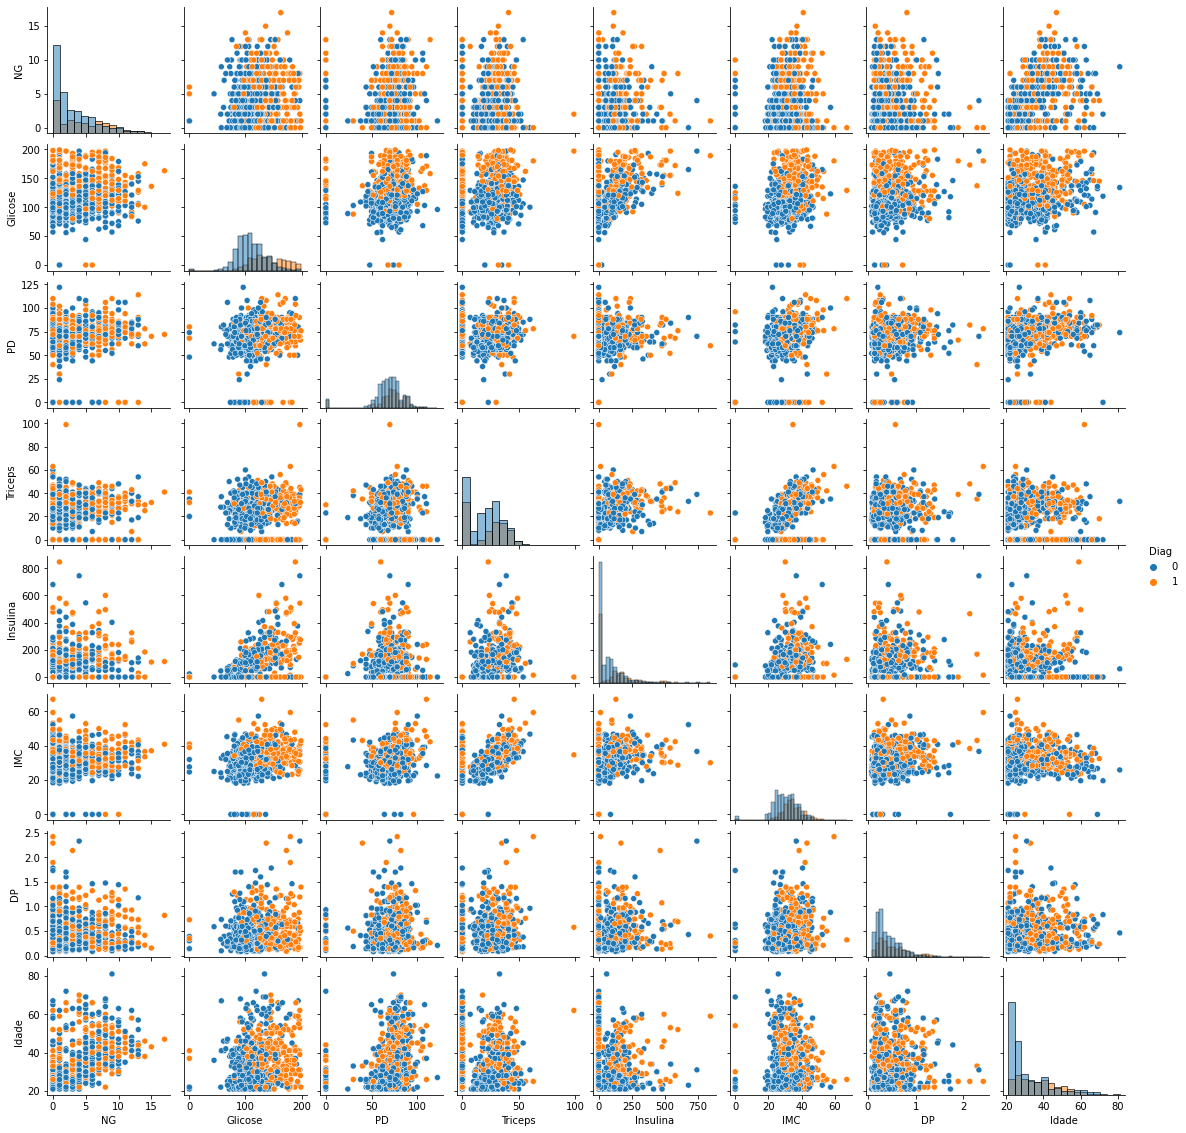

In [13]:
#6
sns.pairplot(df, hue = "Diag", diag_kind = "hist", height = 2)
plt.show()

Dados com difícil separabilidade

# **Classificação**


**Conteúdo sugerido:**

1.   Compare os métodos: Nauves Bayes, KNN e SVM. Monte a matriz de confusão, estime as principais métricas e explore a métrica Cohen-Kappa. Alguma vantagem acerca do método probabilístico? Qual pode ser a métrica mais indicada neste caso?
2.    Normalize os dados e verifique se houve ganho em termos de desempenho. Comente os resultados.
3. Aplique PCA e trabalhe apenas com duas dimensões. Compare os métodos em termos de desempenho.



In [14]:
df.columns

Index(['NG', 'Glicose', 'PD', 'Triceps', 'Insulina', 'IMC', 'DP', 'Idade',
       'Diag'],
      dtype='object')

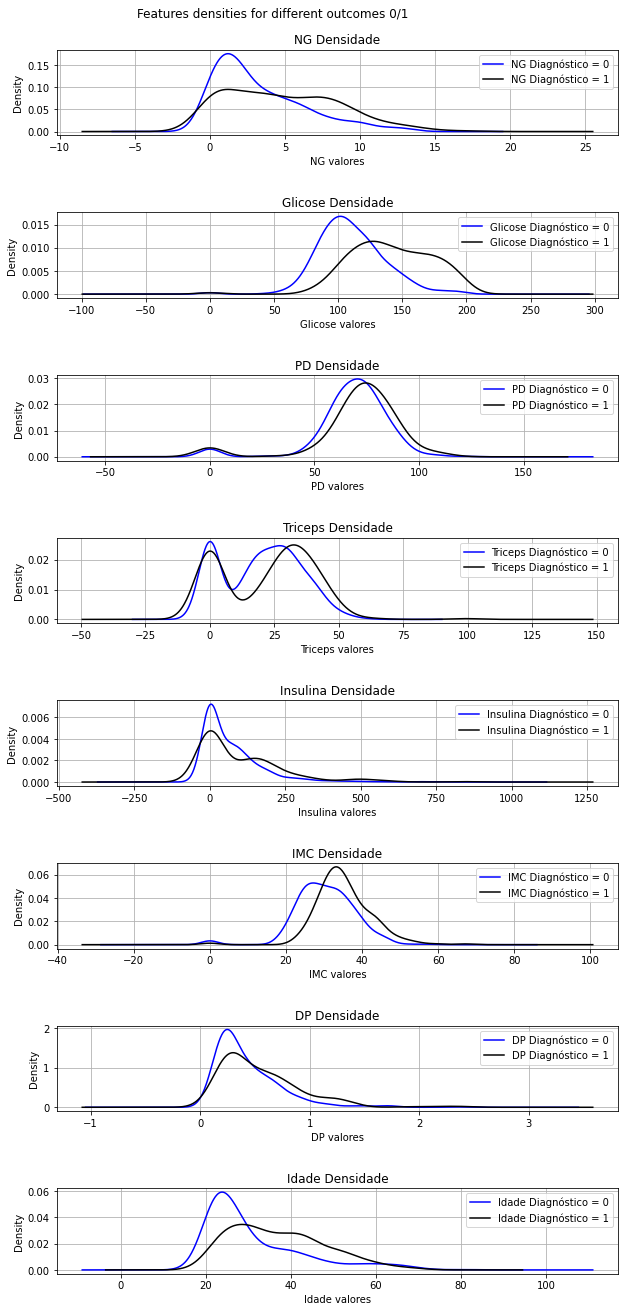

In [15]:
# Visualizando as densidades de probabilidade separadas para cada saída esperada.
data = df
names = list(data.columns)

plot_densities(data)

In [16]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, classification_report

X = df[['NG', 'Glicose', 'PD', 'Triceps', 'Insulina', 'IMC', 'DP', 'Idade']]
y = df['Diag']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state= 50)

In [17]:
# Naives Bayes
from sklearn.naive_bayes import GaussianNB

modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treino, y_treino)

y_predNB = modeloNB.predict(X_teste)

print(classification_report(y_teste, y_predNB))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       101
           1       0.62      0.53      0.57        53

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



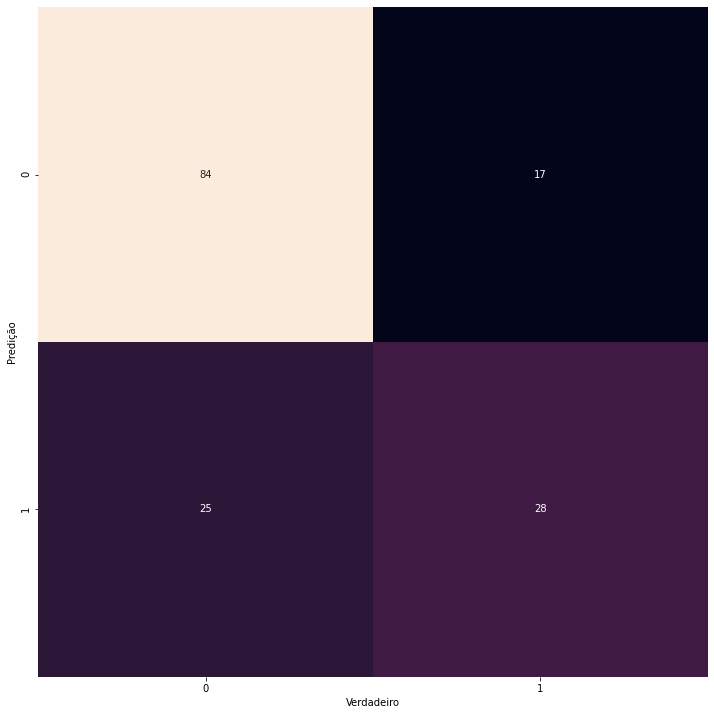

In [18]:
mat = confusion_matrix(y_predNB, y_teste)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Verdadeiro')
plt.ylabel('Predição');

In [19]:
# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.7272727272727273

 [[84 17]
 [25 28]]

Cohen Kappa score 0.3733772524704514


In [20]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(modeloNB, X_teste, y_teste)
print(imps.importances_mean)

[ 1.68831169e-02  6.49350649e-02 -9.09090909e-03  2.22044605e-17
  3.50649351e-02  2.98701299e-02  6.49350649e-03  1.94805195e-02]


In [21]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

modeloKNN = KNeighborsClassifier(n_neighbors = 2)
modeloKNN = modeloKNN.fit(X_treino, y_treino)

y_predKNN = modeloKNN.predict(X_teste)

print(classification_report(y_teste, y_predKNN))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       101
           1       0.71      0.28      0.41        53

    accuracy                           0.71       154
   macro avg       0.71      0.61      0.61       154
weighted avg       0.71      0.71      0.67       154



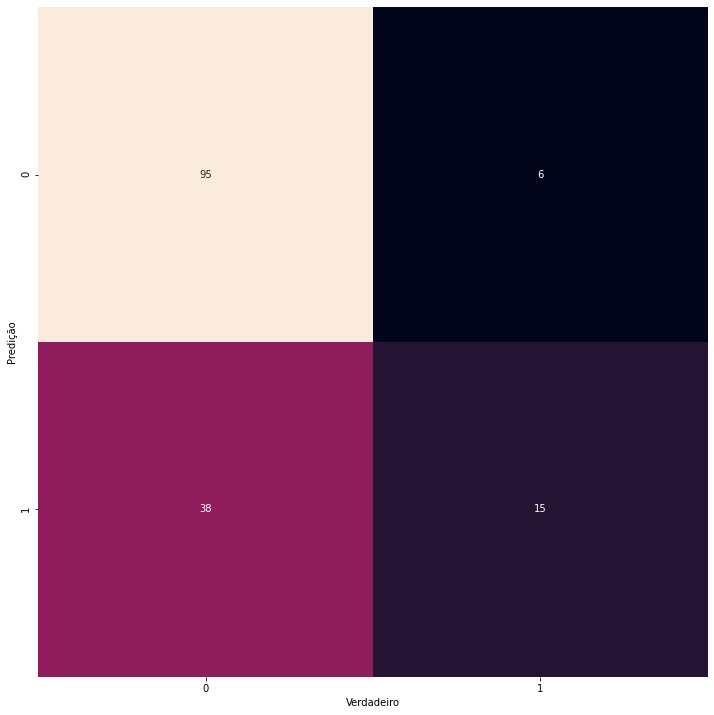

In [22]:
mat = confusion_matrix(y_predKNN, y_teste)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Verdadeiro')
plt.ylabel('Predição');

In [23]:
# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.7142857142857143

 [[95  6]
 [38 15]]

Cohen Kappa score 0.2610687022900764


In [24]:
imps = permutation_importance(modeloKNN, X_teste, y_teste)
print(imps.importances_mean)

[ 0.01038961  0.08051948  0.03116883  0.0038961   0.01168831  0.01818182
  0.         -0.00909091]


In [25]:
# SVM
from sklearn.svm import SVC

modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treino, y_treino)

y_predSVM = modeloSVM.predict(X_teste)

print(classification_report(y_teste, y_predSVM))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       101
           1       0.68      0.40      0.50        53

    accuracy                           0.73       154
   macro avg       0.71      0.65      0.66       154
weighted avg       0.72      0.73      0.70       154



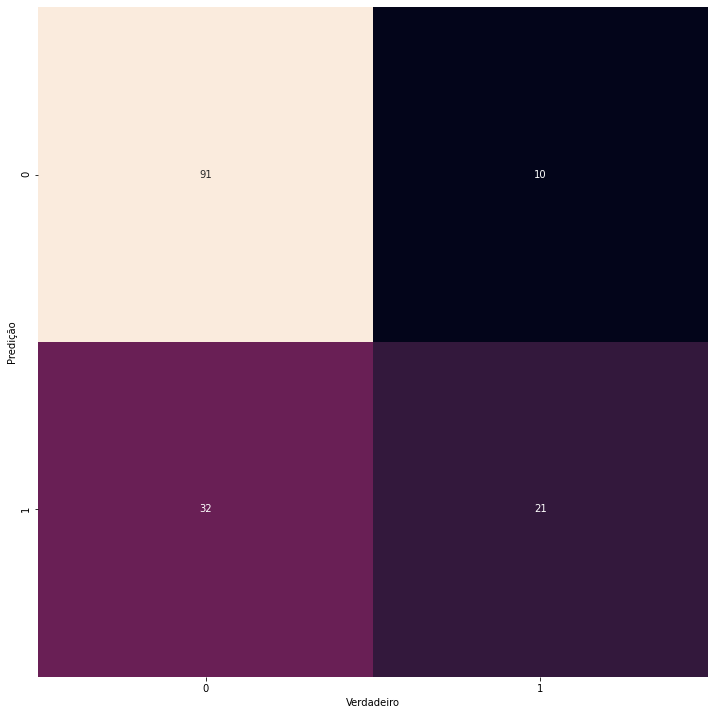

In [26]:
mat = confusion_matrix(y_predSVM, y_teste)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Verdadeiro')
plt.ylabel('Predição');

In [27]:
# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.7272727272727273

 [[91 10]
 [32 21]]

Cohen Kappa score 0.32974093264248705


In [28]:
imps = permutation_importance(modeloSVM, X_teste, y_teste)
print(imps.importances_mean)

[ 0.0012987   0.09350649 -0.00649351 -0.00519481  0.03116883 -0.01688312
  0.         -0.00519481]


## Normalização

**Tipos diferentes de normalização**

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

### StandardScaler

In [30]:
scaler = StandardScaler()

X_treinoSS = scaler.fit_transform(X_treino)
X_testeSS  = scaler.transform(X_teste)

In [31]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoSS, y_treino)

y_predNB = modeloNB.predict(X_testeSS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.7272727272727273

 [[84 17]
 [25 28]]

Cohen Kappa score 0.3733772524704514


In [32]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoSS, y_treino)

y_predKNN = modeloKNN.predict(X_testeSS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.7142857142857143

 [[88 13]
 [31 22]]

Cohen Kappa score 0.31152204836415365


In [33]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoSS, y_treino)

y_predSVM = modeloSVM.predict(X_testeSS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.7077922077922078

 [[86 15]
 [30 23]]

Cohen Kappa score 0.3060284398157421


### Normalizer

In [34]:
scaler = Normalizer()

X_treinoN = scaler.fit_transform(X_treino)
X_testeN  = scaler.transform(X_teste)

In [35]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoN, y_treino)

y_predNB = modeloNB.predict(X_testeN)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.6363636363636364

 [[86 15]
 [41 12]]

Cohen Kappa score 0.08817931909494614


In [36]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoN, y_treino)

y_predKNN = modeloKNN.predict(X_testeN)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.6883116883116883

 [[89 12]
 [36 17]]

Cohen Kappa score 0.2262926522922336


In [37]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoN, y_treino)

y_predSVM = modeloSVM.predict(X_testeN)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.6493506493506493

 [[99  2]
 [52  1]]

Cohen Kappa score -0.001203948952564593


### MinMaxScaler

In [38]:
scaler = MinMaxScaler()

X_treinoMinMax = scaler.fit_transform(X_treino)
X_testeMinMax = scaler.transform(X_teste)

In [39]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoMinMax, y_treino)

y_predNB = modeloNB.predict(X_testeMinMax)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.7272727272727273

 [[84 17]
 [25 28]]

Cohen Kappa score 0.3733772524704514


In [40]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoMinMax, y_treino)

y_predKNN = modeloKNN.predict(X_testeMinMax)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.7467532467532467

 [[91 10]
 [29 24]]

Cohen Kappa score 0.3867674086175209


In [41]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoMinMax, y_treino)

y_predSVM = modeloSVM.predict(X_testeMinMax)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.7142857142857143

 [[86 15]
 [29 24]]

Cohen Kappa score 0.32469603348614706


### MaxAbsScaler

In [42]:
scaler = MaxAbsScaler()

X_treinoMaxAbs = scaler.fit_transform(X_treino)
X_testeMaxAbs = scaler.transform(X_teste)

In [43]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoMaxAbs, y_treino)

y_predNB = modeloNB.predict(X_testeMaxAbs)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.7272727272727273

 [[84 17]
 [25 28]]

Cohen Kappa score 0.3733772524704514


In [44]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoMaxAbs, y_treino)

y_predKNN = modeloKNN.predict(X_testeMaxAbs)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.7402597402597403

 [[92  9]
 [31 22]]

Cohen Kappa score 0.3616580310880829


In [45]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoMaxAbs, y_treino)

y_predSVM = modeloSVM.predict(X_testeMaxAbs)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.7142857142857143

 [[86 15]
 [29 24]]

Cohen Kappa score 0.32469603348614706


### RobustScaler

In [46]:
scaler = RobustScaler()

X_treinoRS = scaler.fit_transform(X_treino)
X_testeRS = scaler.transform(X_teste)

In [47]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoRS, y_treino)

y_predNB = modeloNB.predict(X_testeRS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.7272727272727273

 [[84 17]
 [25 28]]

Cohen Kappa score 0.3733772524704514


In [48]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoRS, y_treino)

y_predKNN = modeloKNN.predict(X_testeRS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.7077922077922078

 [[86 15]
 [30 23]]

Cohen Kappa score 0.3060284398157421


In [49]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoRS, y_treino)

y_predSVM = modeloSVM.predict(X_testeRS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.7142857142857143

 [[87 14]
 [30 23]]

Cohen Kappa score 0.31817267055745624


### QuantileTransformer

In [50]:
scaler = QuantileTransformer()

X_treinoQT = scaler.fit_transform(X_treino)
X_testeQT = scaler.transform(X_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (614). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [51]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoQT, y_treino)

y_predNB = modeloNB.predict(X_testeQT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.7402597402597403

 [[83 18]
 [22 31]]

Cohen Kappa score 0.4141145139813581


In [52]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoQT, y_treino)

y_predKNN = modeloKNN.predict(X_testeQT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.7012987012987013

 [[84 17]
 [29 24]]

Cohen Kappa score 0.3006910167818361


In [53]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoQT, y_treino)

y_predSVM = modeloSVM.predict(X_testeQT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.7207792207792207

 [[86 15]
 [28 25]]

Cohen Kappa score 0.34318587581828996


### PowerTransformer

In [54]:
scaler = PowerTransformer()

X_treinoPT = scaler.fit_transform(X_treino)
X_testePT = scaler.transform(X_teste)

In [55]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoPT, y_treino)

y_predNB = modeloNB.predict(X_testePT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.7467532467532467

 [[85 16]
 [23 30]]

Cohen Kappa score 0.4208293153326904


In [56]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoPT, y_treino)

y_predKNN = modeloKNN.predict(X_testePT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.7467532467532467

 [[87 14]
 [25 28]]

Cohen Kappa score 0.40990371389270974


In [57]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoPT, y_treino)

y_predSVM = modeloSVM.predict(X_testePT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.6818181818181818

 [[86 15]
 [34 19]]

Cohen Kappa score 0.2295282826220134


## PCA

**O que o PCA explica em termos dos dados**

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [58]:
#3
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components = ndimensions, random_state =  42)
pca.fit(X_treino)
X_pca_array = pca.transform(X_treino)
X_treinoPCA = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])

X_treinoPCA.sample(5)

,PC1,PC2
214,-81.712804,6.331510
302,-76.009841,-20.296800
437,38.337984,21.700519
225,88.334325,9.700260
9,76.086139,-8.075164


In [59]:
ndimensions = 2

pca = PCA(n_components = ndimensions, random_state =  42)
pca.fit(X_teste)
X_pca_array = pca.transform(X_teste)
X_testePCA = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])

X_testePCA.sample(5)

,PC1,PC2
119,-80.578522,4.541434
118,-73.786004,77.863726
60,139.385498,-11.614077
48,-81.596717,10.227992
138,-13.871659,-37.308874


In [60]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoPCA, y_treino)

y_predNB = modeloNB.predict(X_testePCA)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.538961038961039

 [[74 27]
 [44  9]]

Cohen Kappa score -0.10556117290192102


In [61]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoPCA, y_treino)

y_predKNN = modeloKNN.predict(X_testePCA)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.538961038961039

 [[72 29]
 [42 11]]

Cohen Kappa score -0.08450704225352124


In [62]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoPCA, y_treino)

y_predSVM = modeloSVM.predict(X_testePCA)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.538961038961039

 [[75 26]
 [45  8]]

Cohen Kappa score -0.11639779456810295


### StandardScaler

In [63]:
scaler = StandardScaler()

X_treinoSS = scaler.fit_transform(X_treinoPCA)
X_testeSS  = scaler.transform(X_testePCA)

In [64]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoSS, y_treino)

y_predNB = modeloNB.predict(X_testeSS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.538961038961039

 [[74 27]
 [44  9]]

Cohen Kappa score -0.10556117290192102


In [65]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoSS, y_treino)

y_predKNN = modeloKNN.predict(X_testeSS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.474025974025974

 [[63 38]
 [43 10]]

Cohen Kappa score -0.19185935409898702


In [66]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoSS, y_treino)

y_predSVM = modeloSVM.predict(X_testeSS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.525974025974026

 [[74 27]
 [46  7]]

Cohen Kappa score -0.14784561976720445


### Normalizer

In [67]:
scaler = Normalizer()

X_treinoN = scaler.fit_transform(X_treinoPCA)
X_testeN  = scaler.transform(X_testePCA)

In [68]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoN, y_treino)

y_predNB = modeloNB.predict(X_testeN)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.43506493506493504

 [[57 44]
 [43 10]]

Cohen Kappa score -0.2458620048354101


In [69]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoN, y_treino)

y_predKNN = modeloKNN.predict(X_testeN)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.44805194805194803

 [[56 45]
 [40 13]]

Cohen Kappa score -0.1958706376758632


In [70]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoN, y_treino)

y_predSVM = modeloSVM.predict(X_testeN)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.43506493506493504

 [[62 39]
 [48  5]]

Cohen Kappa score -0.3040685224839401


### MinMaxScaler

In [71]:
scaler = MinMaxScaler()

X_treinoMinMax = scaler.fit_transform(X_treinoPCA)
X_testeMinMax = scaler.transform(X_testePCA)

In [72]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoMinMax, y_treino)

y_predNB = modeloNB.predict(X_testeMinMax)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.538961038961039

 [[74 27]
 [44  9]]

Cohen Kappa score -0.10556117290192102


In [73]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoMinMax, y_treino)

y_predKNN = modeloKNN.predict(X_testeMinMax)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.4805194805194805

 [[64 37]
 [43 10]]

Cohen Kappa score -0.1825686312152044


In [74]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoMinMax, y_treino)

y_predSVM = modeloSVM.predict(X_testeMinMax)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.5

 [[72 29]
 [48  5]]

Cohen Kappa score -0.21074127016540745


### MaxAbsScaler

In [75]:
scaler = MaxAbsScaler()

X_treinoMaxAbs = scaler.fit_transform(X_treinoPCA)
X_testeMaxAbs = scaler.transform(X_testePCA)

In [76]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoMaxAbs, y_treino)

y_predNB = modeloNB.predict(X_testeMaxAbs)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.538961038961039

 [[74 27]
 [44  9]]

Cohen Kappa score -0.10556117290192102


In [77]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoMaxAbs, y_treino)

y_predKNN = modeloKNN.predict(X_testeMaxAbs)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.4805194805194805

 [[62 39]
 [41 12]]

Cohen Kappa score -0.16116870876531575


In [78]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoMaxAbs, y_treino)

y_predSVM = modeloSVM.predict(X_testeMaxAbs)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.512987012987013

 [[73 28]
 [47  6]]

Cohen Kappa score -0.17929344496630595


### RobustScaler

In [79]:
scaler = RobustScaler()

X_treinoRS = scaler.fit_transform(X_treinoPCA)
X_testeRS = scaler.transform(X_testePCA)

In [80]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoRS, y_treino)

y_predNB = modeloNB.predict(X_testeRS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.538961038961039

 [[74 27]
 [44  9]]

Cohen Kappa score -0.10556117290192102


In [81]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoRS, y_treino)

y_predKNN = modeloKNN.predict(X_testeRS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.4675324675324675

 [[64 37]
 [45  8]]

Cohen Kappa score -0.22340631660530907


In [82]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoRS, y_treino)

y_predSVM = modeloSVM.predict(X_testeRS)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.5194805194805194

 [[74 27]
 [47  6]]

Cohen Kappa score -0.16930022573363424


### QuantileTransformer

In [83]:
scaler = QuantileTransformer()

X_treinoQT = scaler.fit_transform(X_treinoPCA)
X_testeQT = scaler.transform(X_testePCA)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (614). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [84]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoQT, y_treino)

y_predNB = modeloNB.predict(X_testeQT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.4675324675324675

 [[59 42]
 [40 13]]

Cohen Kappa score -0.16904276985743394


In [85]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoQT, y_treino)

y_predKNN = modeloKNN.predict(X_testeQT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.5194805194805194

 [[74 27]
 [47  6]]

Cohen Kappa score -0.16930022573363424


In [86]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoQT, y_treino)

y_predSVM = modeloSVM.predict(X_testeQT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.525974025974026

 [[73 28]
 [45  8]]

Cohen Kappa score -0.13670374115267947


### PowerTransformer

In [87]:
scaler = PowerTransformer()

X_treinoPT = scaler.fit_transform(X_treinoPCA)
X_testePT = scaler.transform(X_testePCA)

In [88]:
# Naives Bayes
modeloNB = GaussianNB()
modeloNB = modeloNB.fit(X_treinoPT, y_treino)

y_predNB = modeloNB.predict(X_testePT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predNB))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predNB))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predNB))

Acurácia: 0.487012987012987

 [[68 33]
 [46  7]]

Cohen Kappa score -0.20670501884546733


In [89]:
# KNN
modeloKNN = KNeighborsClassifier(n_neighbors = 9)
modeloKNN = modeloKNN.fit(X_treinoPT, y_treino)

y_predKNN = modeloKNN.predict(X_testePT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predKNN))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predKNN))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predKNN))

Acurácia: 0.525974025974026

 [[68 33]
 [40 13]]

Cohen Kappa score -0.08408871745419488


In [90]:
# SVM
modeloSVM = SVC()
modeloSVM = modeloSVM.fit(X_treinoPT, y_treino)

y_predSVM = modeloSVM.predict(X_testePT)

# Score
print('Acurácia:', accuracy_score(y_teste,y_predSVM))

# Matriz de confusão
print('\n',confusion_matrix(y_teste, y_predSVM))

# Cohen Kappa score
print('\nCohen Kappa score', cohen_kappa_score(y_teste, y_predSVM))

Acurácia: 0.5194805194805194

 [[72 29]
 [45  8]]

Cohen Kappa score -0.14670959951700535


# **Agrupamento (cluster)**



1.   Utilize o método k-means para tentar agrupar os dados referentes ao dignóstico. Oberve que o método pode modificar a forma como é designado o diagnóstico. Pesquise se há uma forma de impor.
2.  Utilize o método GMM para tentar agrupar os dados referentes ao dignóstico. Oberve que o método pode modificar a forma como é designado o diagnóstico. Pesquise se há uma forma de impor.
3.  Elabore um método que possibilite otimizar o número de agrupamentos possíveis e, valide se a proposta faz sentido ou não.



In [91]:
#1 KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ncluster = 2
seed = 0

modeloKM = KMeans(n_clusters = ncluster, random_state = seed)
modeloKM = modeloKM.fit(X)

y_predKM = modeloKM.predict(X)

silhouette_score(X, y_predKM)

0.5687897205830247

In [92]:
scaler = StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,NG,Glicose,PD,Triceps,Insulina,IMC,DP,Idade
34,1.827813,0.034598,0.459827,0.656358,-0.692891,-0.557503,0.121178,1.000557
36,2.124780,0.535352,0.356432,-1.288212,-0.692891,0.153245,-0.156673,0.149679
162,-1.141852,-0.215779,0.563223,0.844542,1.781735,1.549357,-0.920763,-0.531023
532,-0.844885,-1.092099,-0.160546,1.973647,-0.128502,1.181291,1.344326,-0.360847
382,-0.844885,-0.372265,-0.470732,-0.786388,0.887396,-0.836725,1.434930,-1.041549


In [93]:
ncluster = 2
seed = 0

modeloKM = KMeans(n_clusters = ncluster, random_state = seed)
modeloKM = modeloKM.fit(X_scaled)

y_predKM = modeloKM.predict(X_scaled)

silhouette_score(X_scaled, y_predKM)

0.19540479792796747

In [94]:
#2
from sklearn.mixture import GaussianMixture

ncluster = 2
seed = 0

modeloGMM = GaussianMixture(n_components =  ncluster)
modeloGMM = modeloGMM.fit(X)

y_predGMM = modeloGMM.predict(X)

silhouette_score(X, y_predGMM)

0.3919496047300402

In [95]:
ncluster = 2
seed = 0

modeloGMM = GaussianMixture(n_components =  ncluster)
modeloGMM = modeloGMM.fit(X_scaled)

y_predGMM = modeloGMM.predict(X_scaled)

silhouette_score(X_scaled, y_predGMM)

0.16532525009844776

# **Visualização**


Utilizando dimensionalidade 2 (visando facilitar a visualização)

1.   Compare os classificadores utilizando um mapa de cores de fundo e dados, visando mostrar as fronteiras estabelecidas.
2.   Compare os agrupamentos utilizando um mapa de cores de fundo e dados, visando mostrar as fronteiras estabelecidas.



In [96]:
df.sample(3)

,NG,Glicose,PD,Triceps,Insulina,IMC,DP,Idade,Diag
98,6,93,50,30,64,28.7,0.356,23,0
683,4,125,80,0,0,32.3,0.536,27,1
430,2,99,0,0,0,22.2,0.108,23,0


In [97]:
X = np.array(df[['Glicose','Idade']])
y = np.array(df[['Diag']])
y = np.ravel(y, order='C')

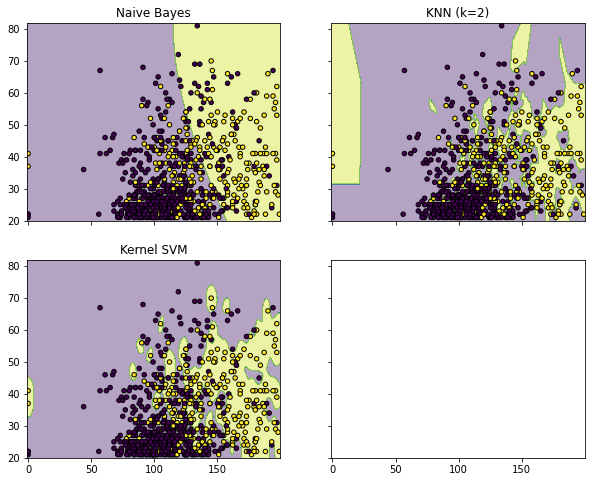

In [98]:
from itertools import product

####### Criando os calssificadores

clf1 = GaussianNB()
clf2 = KNeighborsClassifier(n_neighbors=2)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)

####### Treinando os calssificadores

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)

####### Regiões de convergência
#
# Cria uma malha para predição do classificador em estudo

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

####### Para cada classificador faz uma predição e compara

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3],
                        ['Naive Bayes', 'KNN (k=2)',
                         'Kernel SVM']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# **Referências**

https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html